# Resource





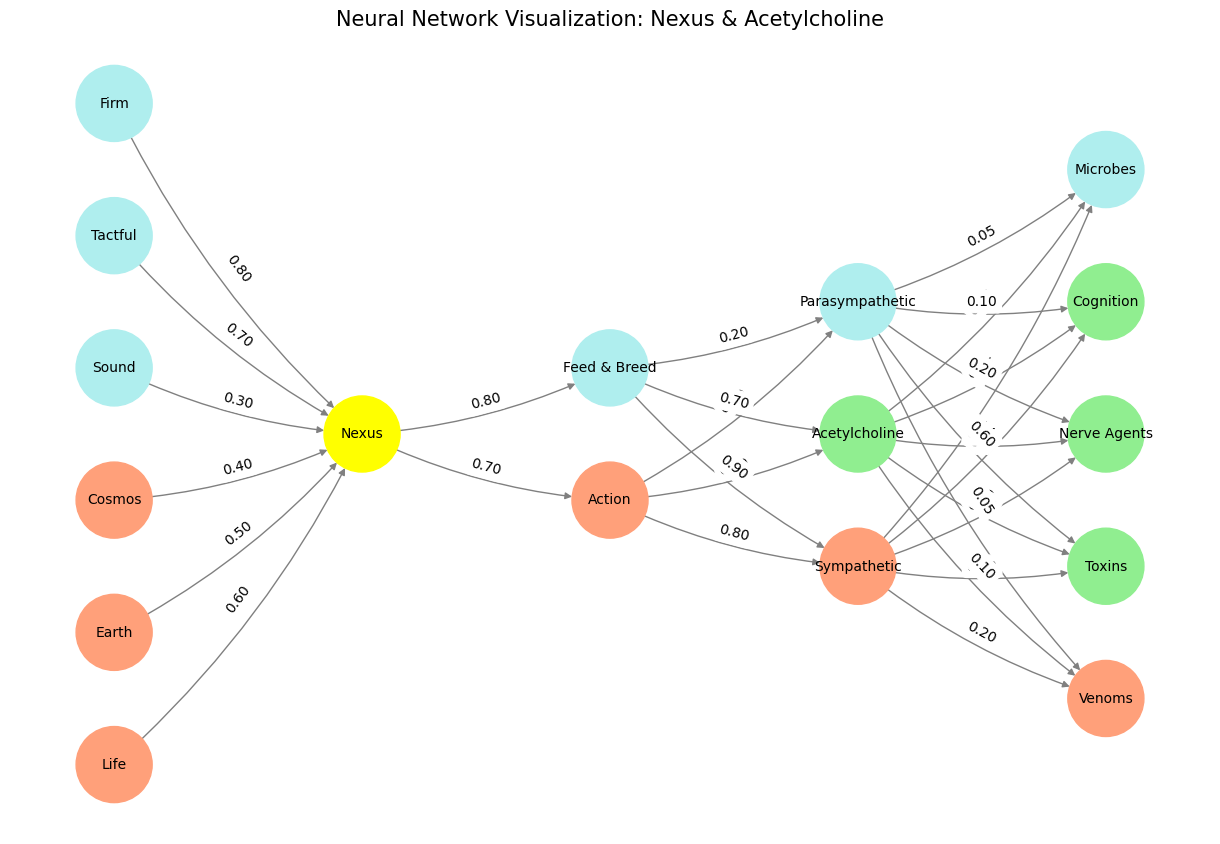

In [1]:
# Code provided by the user with some minor adjustments to run and generate the visualization

import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Define the neural network structure
def define_layers():
    return {
        'Pre-Input': ['Life', 'Earth', 'Cosmos', 'Sound', 'Tactful', 'Firm'],
        'Yellowstone': ['Nexus'],
        'Input': ['Action', 'Feed & Breed'],
        'Hidden': ['Sympathetic', 'Acetylcholine', 'Parasympathetic'],
        'Output': ['Venoms', 'Toxins', 'Nerve Agents', 'Cognition', 'Microbes']
    }

# Define weights for the connections
def define_weights():
    return {
        'Pre-Input-Yellowstone': np.array([[0.6], [0.5], [0.4], [0.3], [0.7], [0.8]]),
        'Yellowstone-Input': np.array([[0.7, 0.8]]),
        'Input-Hidden': np.array([[0.8, 0.4, 0.1], [0.9, 0.7, 0.2]]),
        'Hidden-Output': np.array([
            [0.2, 0.8, 0.1, 0.05, 0.2],
            [0.1, 0.9, 0.05, 0.05, 0.1],
            [0.05, 0.6, 0.2, 0.1, 0.05]
        ])
    }

# Assign colors to nodes
def assign_colors(node, layer):
    if node == 'Nexus':
        return 'yellow'
    if layer == 'Pre-Input' and node in ['Sound', 'Tactful', 'Firm']:
        return 'paleturquoise'
    elif layer == 'Input' and node == 'Feed & Breed':
        return 'paleturquoise'
    elif layer == 'Hidden':
        if node == 'Parasympathetic':
            return 'paleturquoise'
        elif node == 'Acetylcholine':
            return 'lightgreen'
        elif node == 'Sympathetic':
            return 'lightsalmon'
    elif layer == 'Output':
        if node == 'Microbes':
            return 'paleturquoise'
        elif node in ['Cognition', 'Nerve Agents', 'Toxins']:
            return 'lightgreen'
        elif node == 'Venoms':
            return 'lightsalmon'
    return 'lightsalmon'  # Default color

# Calculate positions for nodes
def calculate_positions(layer, center_x, offset):
    layer_size = len(layer)
    start_y = -(layer_size - 1) / 2  # Center the layer vertically
    return [(center_x + offset, start_y + i) for i in range(layer_size)]

# Create and visualize the neural network graph
def visualize_nn():
    layers = define_layers()
    weights = define_weights()
    G = nx.DiGraph()
    pos = {}
    node_colors = []
    center_x = 0  # Align nodes horizontally

    # Add nodes and assign positions
    for i, (layer_name, nodes) in enumerate(layers.items()):
        y_positions = calculate_positions(nodes, center_x, offset=-len(layers) + i + 1)
        for node, position in zip(nodes, y_positions):
            G.add_node(node, layer=layer_name)
            pos[node] = position
            node_colors.append(assign_colors(node, layer_name))

    # Add edges and weights
    for layer_pair, weight_matrix in zip(
        [('Pre-Input', 'Yellowstone'), ('Yellowstone', 'Input'), ('Input', 'Hidden'), ('Hidden', 'Output')],
        [weights['Pre-Input-Yellowstone'], weights['Yellowstone-Input'], weights['Input-Hidden'], weights['Hidden-Output']]
    ):
        source_layer, target_layer = layer_pair
        for i, source in enumerate(layers[source_layer]):
            for j, target in enumerate(layers[target_layer]):
                weight = weight_matrix[i, j] if i < weight_matrix.shape[0] and j < weight_matrix.shape[1] else 0
                if weight > 0:  # Add edges only for non-zero weights
                    G.add_edge(source, target, weight=weight)

    # Draw the graph
    plt.figure(figsize=(12, 8))
    nx.draw(
        G, pos, with_labels=True, node_color=node_colors, edge_color='gray',
        node_size=3000, font_size=10, connectionstyle="arc3,rad=0.1"
    )
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels={k: f'{v:.2f}' for k, v in edge_labels.items()})
    plt.title("Neural Network Visualization: Nexus & Acetylcholine", fontsize=15)
    plt.show()

# Run the visualization
visualize_nn()


```{figure} https://upload.wikimedia.org/wikipedia/commons/4/49/%22The_School_of_Athens%22_by_Raffaello_Sanzio_da_Urbino.jpg
---
width: 100%
height: 100%
---
Ultimately, Nietzsche’s critique of Dawkins and Hirsi Ali is not about the validity of their arguments but about their failure to engage with the aesthetic dimensions of life. By reducing existence to ideological or biological terms, they overlook the "diet, locality, and climate" that ground human flourishing. The neural network’s layers remind us that abstraction and intellectualization must remain connected to the tangible and the experiential. Without this connection, humanity risks becoming a caricature of itself: all intellect, no substance, and entirely out of tune with the symphony of life.
```


